
## Se importan librerías a utilizar

In [27]:
import pandas as pd


# 1. Data Loading

In [28]:
bomba_data = pd.read_csv('../data/processed/Data.csv')


# 2. EDA (Exploratory Data Analysis)

In [29]:
# Verifico la cantidad de datos que hay en los dataset
bomba_data.shape

(4038, 15)

In [30]:
# Verifico las columnas que hay en el dataset
bomba_data.head().T

,0,1,2,3,4
Unnamed: 0,0.00,1.0,2.00,3.0,4.0
Basal Rate (U/h),1.95,1.6,1.95,2.7,2.2
BWZ Estimate (U),9.50,6.6,5.50,4.4,11.2
BWZ Carb Ratio (U/Ex),1.00,1.9,1.00,1.1,1.5
BWZ Insulin Sensitivity (mg/dL/U),45.00,45.0,45.00,45.0,45.0
BWZ Carb Input (exchanges),9.50,3.5,5.50,4.0,7.5
BWZ BG Input (mg/dL),84.00,111.0,99.00,97.0,75.0
BWZ Correction Estimate (U),0.00,0.0,0.00,0.0,0.0
BWZ Food Estimate (U),9.50,6.6,5.50,4.4,11.2
BWZ Active Insulin (U),0.00,0.0,0.00,1.2,0.0


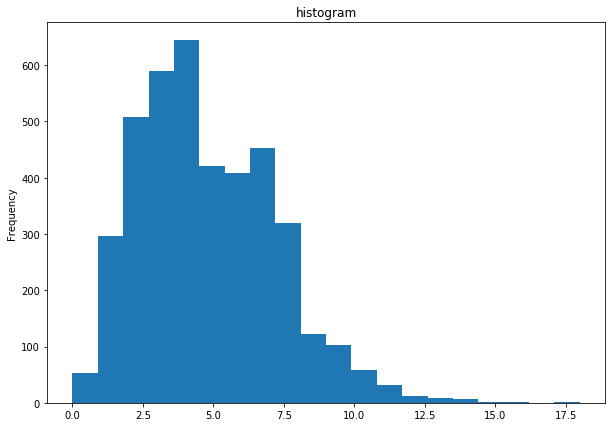

In [31]:
# Plot del la columna que se va a predecir (y)
bomba_data['BWZ Estimate (U)'].plot(kind='hist', bins=20, title='histogram', figsize=(10, 7));

In [32]:
# Paso a una lista el nombre de las columnas
bomba_data.columns.tolist()

['Unnamed: 0',
 'Basal Rate (U/h)',
 'BWZ Estimate (U)',
 'BWZ Carb Ratio (U/Ex)',
 'BWZ Insulin Sensitivity (mg/dL/U)',
 'BWZ Carb Input (exchanges)',
 'BWZ BG Input (mg/dL)',
 'BWZ Correction Estimate (U)',
 'BWZ Food Estimate (U)',
 'BWZ Active Insulin (U)',
 'BWZ Unabsorbed Insulin Total (U)',
 'day_of_month',
 'day_of_week',
 'month_of_year',
 'hour']

# 3. ML PREPROCESSING

In [33]:
# Cargo las librerías a utilizar.

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler

## Documentación importante para consultar:

* https://scikit-learn.org
* https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
* https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [34]:
# Food estimate lo quitamos de la lista por correlación = 1 con BWZ Estimate (U)
# Divido las columnas en númericas y categóricas
# Indico la columna objetivo y = TARGET
NUM_FEATS = ['Basal Rate (U/h)','BWZ Carb Ratio (U/Ex)','BWZ Insulin Sensitivity (mg/dL/U)',
             'BWZ Carb Input (exchanges)', 'BWZ BG Input (mg/dL)','BWZ Correction Estimate (U)',
             'BWZ Active Insulin (U)','BWZ Unabsorbed Insulin Total (U)']
CAT_FEATS = ['day_of_month', 'day_of_week', 'month_of_year', 'hour']
FEATS = NUM_FEATS + CAT_FEATS
TARGET = 'BWZ Estimate (U)'
FEATS

['Basal Rate (U/h)',
 'BWZ Carb Ratio (U/Ex)',
 'BWZ Insulin Sensitivity (mg/dL/U)',
 'BWZ Carb Input (exchanges)',
 'BWZ BG Input (mg/dL)',
 'BWZ Correction Estimate (U)',
 'BWZ Active Insulin (U)',
 'BWZ Unabsorbed Insulin Total (U)',
 'day_of_month',
 'day_of_week',
 'month_of_year',
 'hour']

## Preprocessing...

In [35]:
from sklearn import preprocessing 

In [36]:
# Defino el Pipelinte de las columnas numéricas
numeric_transformer = \
Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), 
                ('scaler', StandardScaler())])

In [37]:
# Defino el Pipelinte de las columnas categóricas

categorical_transformer = \
Pipeline(steps=[('imputer', SimpleImputer(strategy='constant',fill_value=-999999)),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])
categorical_transformer

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True,
                               fill_value=-999999, missing_values=nan,
                               strategy='constant', verbose=0)),
                ('onehot',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='ignore', sparse=True))],
         verbose=False)

In [38]:
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, NUM_FEATS),
                                              ('cat', categorical_transformer, CAT_FEATS)])

preprocessor


ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='median',
                                                                verbose=0)),
                                                 ('scaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                           

In [39]:
# Paso a DataFrame los datos procesados
pd.DataFrame(data=preprocessor.fit_transform(bomba_data))

,0
0,"(0, 0)\t3.8702534495637124\n (0, 1)\t0.6972..."
1,"(0, 0)\t2.599456167744954\n (0, 1)\t5.73670..."
2,"(0, 0)\t3.8702534495637124\n (0, 1)\t0.6972..."
3,"(0, 0)\t6.5933904820324845\n (0, 1)\t1.2571..."
4,"(0, 0)\t4.777965793719971\n (0, 1)\t3.49694..."
...,...
4033,"(0, 0)\t-1.0313932088800741\n (0, 1)\t0.697..."
4034,"(0, 0)\t-1.2129356777113252\n (0, 1)\t0.697..."
4035,"(0, 0)\t-1.7575630842050793\n (0, 1)\t0.697..."
4036,"(0, 0)\t-1.7575630842050793\n (0, 1)\t0.697..."


In [40]:
# Al haber muchas columnas nuevas categóricas se crea una única columna comprimida que sirve igualmente para realizar todo el proceso.
data=preprocessor.fit_transform(bomba_data)
data

<4038x81 sparse matrix of type '<class 'numpy.float64'>'
	with 48456 stored elements in Compressed Sparse Row format>

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
# Se definen X_train, X_test, y_train, y_test a partir de bomba_data.
X_train, X_test, y_train, y_test = train_test_split(bomba_data[FEATS], bomba_data[TARGET], test_size=0.2) 


In [43]:
# Verifico las dimensiones de X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3230, 12)
(808, 12)
(3230,)
(808,)


In [44]:
# Cargo el modelo a utilizar
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


In [45]:
# Defino el modelo y los pasos (steps) a utilizar en el Pipeline

model= Pipeline(steps=[('preprocessor', preprocessor),
                       ('regressor', RandomForestRegressor())])

In [46]:
# Entreno el modelo
model.fit(X_train, y_train);

# 5. Check model performance on test and train data

In [47]:
# Se importan las metricas para evaluar el error cometido
from sklearn.metrics import mean_squared_error, r2_score


In [48]:
# Defino los datos sobre los que se va a predecir en el modelo X_train y X_test
# Nota: En el Pipeline de categorical_transformer hay que poner fill_value=-999999 
# para que no de un error de falta de datos en alguna celda debido a la transformación

y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)



In [49]:
#Error sobre train y sobre test

print(f"train error: {mean_squared_error(y_pred=y_predict_train, y_true=y_train, squared=False)}")
print(f"test error: {mean_squared_error(y_pred=y_predict_test, y_true=y_test, squared=False)}")

train error: 0.03904494909121532
test error: 0.13916218545778225


In [50]:
# Calculo del error metrica r2_score

print(f' test train: {r2_score(y_true=y_train, y_pred=y_predict_train)}')
print(f' test error: {r2_score(y_true=y_test, y_pred=y_predict_test)}')

 test train: 0.9997369337797125
 test error: 0.9966079148656782


# 6. Check model performance using cross validation

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
scores = cross_val_score(model, 
                         bomba_data[FEATS], 
                         bomba_data[TARGET], 
                         scoring='neg_root_mean_squared_error', 
                         cv=32, n_jobs=-1)

In [53]:
import numpy as np
np.mean(-scores)

0.11134345932513695

In [54]:
print(-scores)


[1.35667197 0.1626471  0.14162724 0.0688178  0.01649242 0.02284766
 0.01316682 0.0332604  0.01756439 0.07964355 0.04203778 0.11487906
 0.08439081 0.07334275 0.05626637 0.0425867  0.02884015 0.02308662
 0.0396072  0.01967494 0.03594584 0.09363955 0.09974491 0.16002916
 0.05030928 0.03861696 0.04183442 0.04381319 0.23150292 0.1477031
 0.09510783 0.08729179]


# 7. Optimize model using grid search

In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
# Se definen los parametros del grid y del model
# verbose muestra los pasos que ha haciendo el modelo de entrenamiento.
# cv : validación cruzada
# n_jobs = -1 significa que utiliza todos los procesadores para realizar el proceso.
#
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median','most_frequent','constant'],
    'regressor__n_estimators': [8,16,64,128,256,512],
    'regressor__max_depth': [4,8,16,32],
    'regressor__max_features': ['auto', 'sqrt']
}

grid_search = RandomizedSearchCV(model, 
                                 param_grid, 
                                 cv= 10, 
                                 verbose=10, 
                                 scoring='neg_root_mean_squared_error', 
                                 n_jobs=-1,
                                 n_iter=16)

grid_search.fit(bomba_data[FEATS], bomba_data[TARGET])

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  3.4min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('preprocessor',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('num',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('imputer',
                                                                                                SimpleImputer(add_indicator=False,
                                                                                    

In [57]:
# Visualizo los mejores parámetros
grid_search.best_params_

{'regressor__n_estimators': 256,
 'regressor__max_features': 'auto',
 'regressor__max_depth': 16,
 'preprocessor__num__imputer__strategy': 'mean'}

In [58]:
grid_search.best_score_

-0.19815897573736788

In [59]:
grid_search.best_estimator_.score

<function sklearn.pipeline.Pipeline.score(self, X, y=None, sample_weight=None)>

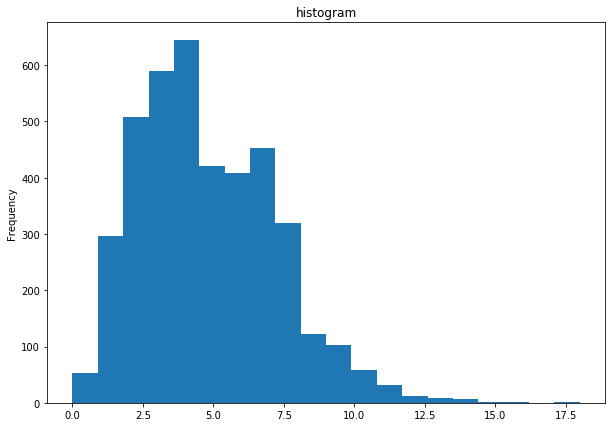

In [60]:
bomba_data[TARGET].plot(kind='hist', bins=20, title='histogram', figsize=(10, 7));

In [61]:
y_test = pd.DataFrame(y_test)
y_test

,BWZ Estimate (U)
3133,4.0
2863,6.8
3517,7.1
2673,1.9
3767,7.0
...,...
2931,1.1
1870,3.6
1150,7.6
4006,3.3


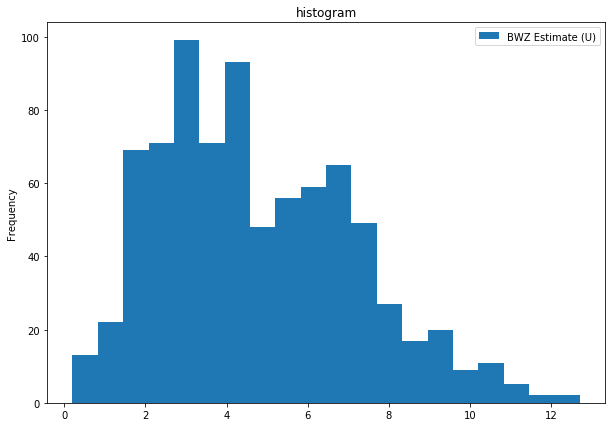

In [62]:
y_test.plot(kind='hist', bins=20, title='histogram', figsize=(10, 7));